#  The Python Project :-

In [1]:
# the libiraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### Load The Data

In [2]:
df=pd.read_csv("diamond.csv")

In [3]:
df.shape

(54010, 11)

### Remove duplicate

In [4]:
df.duplicated().sum()

67

In [5]:
df=df.drop_duplicates()

In [6]:
df.shape

(53943, 11)

### Remove Null Values

In [7]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         4
table         4
price         0
x             0
y             0
z             0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

### Remove Rubbish Values

In [10]:
print(df[df['x'] == 0].shape[0])
print(df[df['y'] == 0].shape[0])
print(df[df['z'] == 0].shape[0])

8
7
20


In [11]:
df1 = df[(df[['x' , 'y' , 'z']] !=0).all(axis = 1)]

In [12]:
df1.shape

(53919, 11)

###  Removing outliers

In [13]:
Q1 = df1['price'].quantile(0.25)
Q3 = df1['price'].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[~((df1['price'] < (Q1 - 1.5 * IQR)) | (df1['price'] > (Q3 + 1.5 * IQR)))]
df1.shape

(50387, 11)

### Correlation

In [14]:
corr = df1[['carat' , 'depth' , 'table' , 'price' , 'x' , 'y' , 'z']].corr()['price'].sort_values(ascending = False)
corr

price    1.000000
carat    0.915880
x        0.897494
y        0.892794
z        0.873169
table    0.128112
depth    0.004190
Name: price, dtype: float64

### Add a New  Column

In [15]:
def custom_calculation(price):
    if price < 1000:
        return 'Cheap'
    elif 1000 <= price < 8000:
        return 'Normal'
    else:  # price >= 8000
        return 'Expensive'
# Apply the function to create a new column
df = df1[['price']].copy() 
df1['price_category'] = df1['price'].apply(custom_calculation)
df1.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,price_category
41235,41236,0.39,Premium,E,VVS2,61.1,59.0,1207,4.74,4.68,2.88,Normal
50839,50840,0.70,Ideal,G,SI1,61.9,58.0,2310,5.69,5.72,3.53,Normal
45090,45091,0.59,Ideal,D,SI1,62.5,55.0,1646,5.40,5.42,3.38,Normal
42190,42191,0.50,Premium,F,SI1,61.0,60.0,1286,5.11,5.08,3.11,Normal
32989,32990,0.38,Premium,D,SI2,62.1,55.0,812,4.65,4.62,2.88,Cheap
14736,14737,1.01,Ideal,F,SI1,61.7,56.0,5932,6.45,6.48,3.99,Normal
9889,9890,1.02,Ideal,F,SI2,61.6,56.0,4684,6.52,6.49,4.01,Normal
28277,28278,0.31,Very Good,J,SI1,61.9,59.0,363,4.28,4.32,2.66,Cheap
34761,34762,0.41,Ideal,E,SI2,60.7,57.0,876,4.85,4.81,2.93,Cheap
45672,45673,0.52,Ideal,E,VS2,60.4,57.0,1694,5.22,5.17,3.14,Normal


# The First Chart For Visualization  

## Count Values For Color 

<Axes: ylabel='count'>

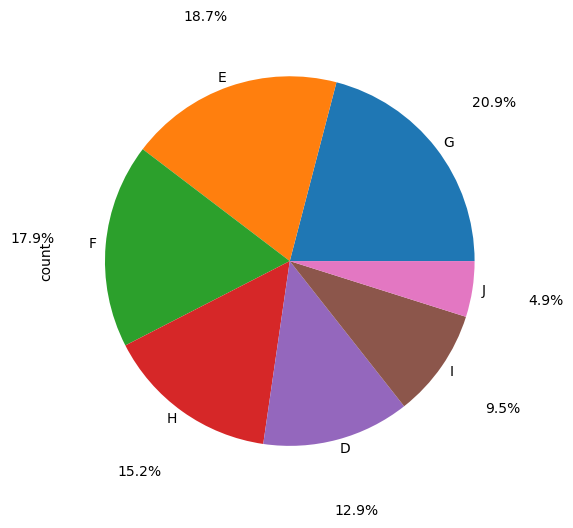

In [16]:
df1['color'].value_counts().plot.pie( autopct='%1.1f%%', labeldistance= 1.05 , pctdistance=1.4 , figsize = (6 , 6) )

## Count Value of Clarity (Histogram Chart)

<Axes: xlabel='clarity', ylabel='Count'>

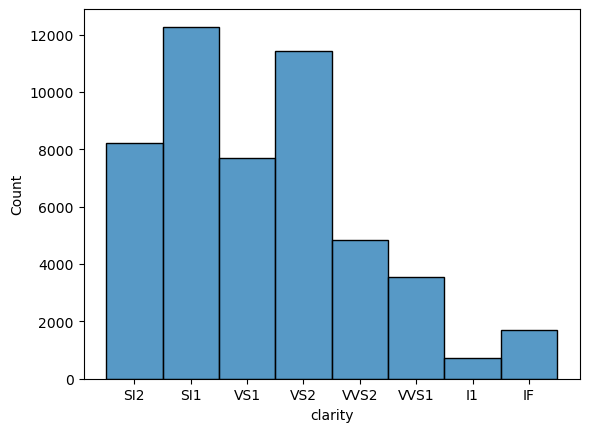

In [17]:
sns.histplot(df1['clarity'])

## Count Value of Price_Category (Histogram Chart)

<Axes: xlabel='price_category', ylabel='Count'>

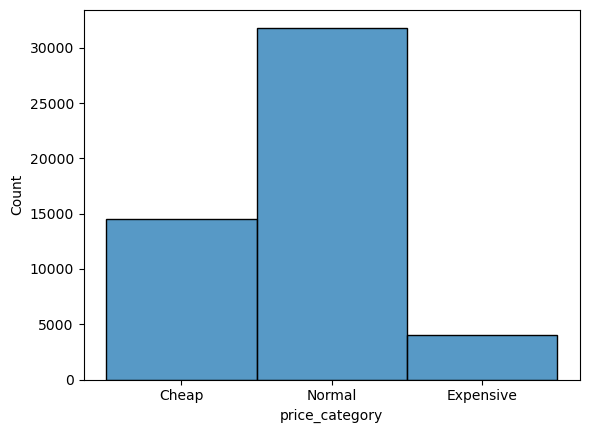

In [18]:
sns.histplot(df1['price_category'])

## Box Plot For Cut and Price To Discrip The Data 

<Axes: xlabel='cut', ylabel='price'>

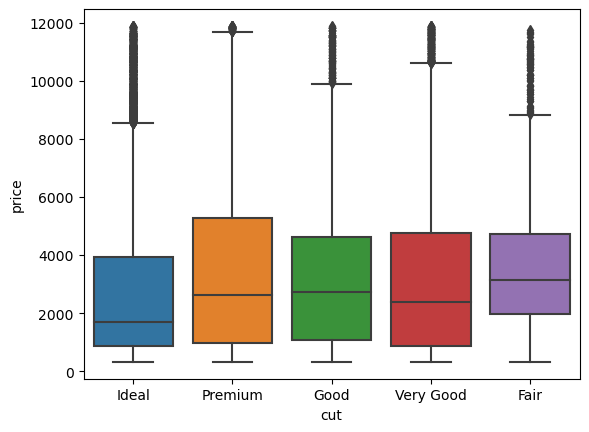

In [19]:
sns.boxplot(data = df1 , x = 'cut' , y = 'price')

## Descrip Relation Between Carat and Price 

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


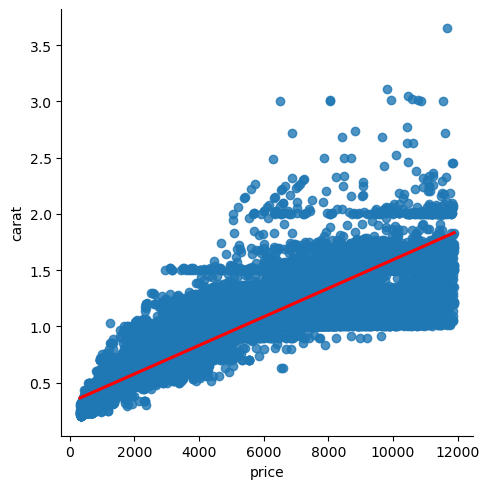

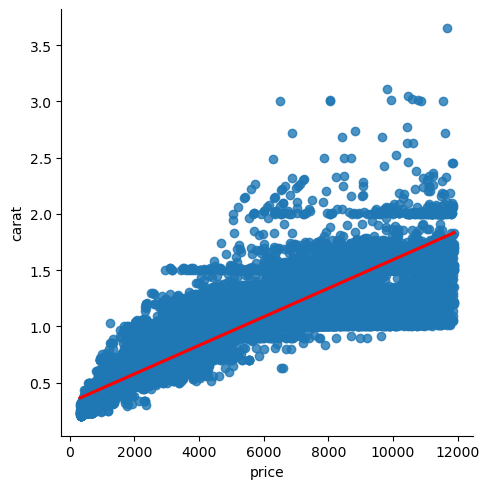

In [20]:
lm = sns.lmplot(data = df1 , x = 'price' , y = 'carat' , line_kws = {'color': 'red'})
lm = sns.lmplot(data = df1 , x = 'price' , y = 'carat' , line_kws = {'color': 'red'})

## Descrip is Each Type of Cut Available in Color or not

Text(0.5, 1.0, 'Line plot')

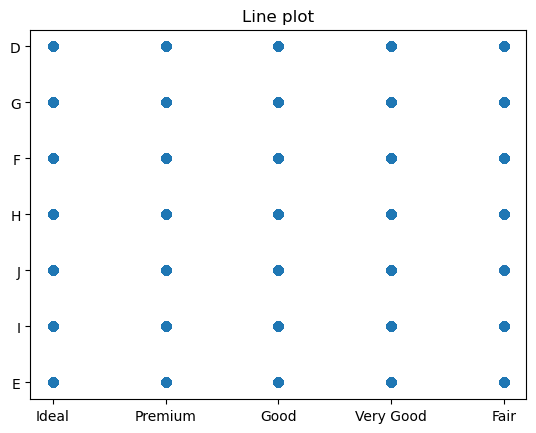

In [21]:
plt.scatter(df1['cut'],df1['color'])
plt.title('Line plot')

## Descrip The Count Value of Cut 

<Axes: xlabel='cut'>

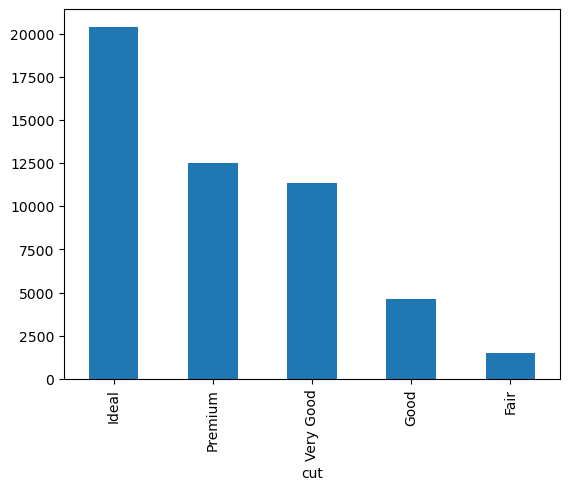

In [22]:
df1['cut'].value_counts().plot.bar()

## Descrip the Average of Each Cut and Color Available in Carat 

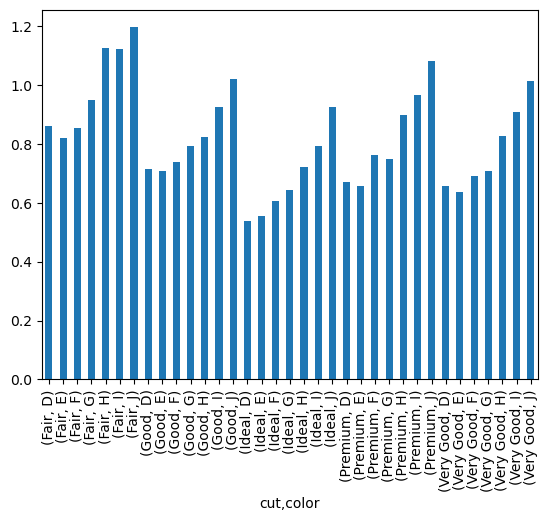

In [23]:
avg_price = df1.groupby(['cut','color'])['carat'].mean().plot(kind='bar')

## Descrip of cut and sum of carat 

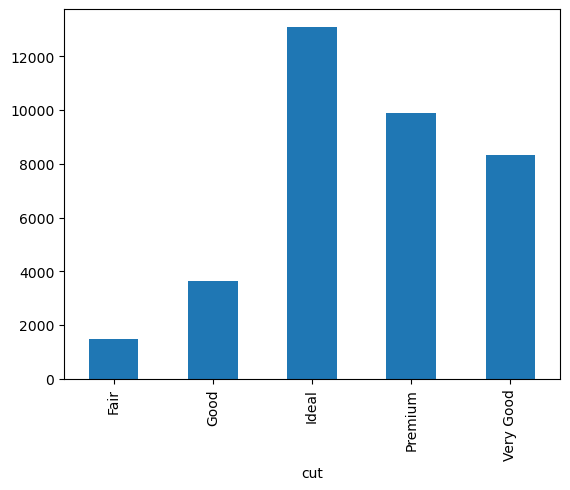

In [24]:
avg = df1.groupby(['cut'])['carat'].sum().plot(kind='bar')

In [25]:
# تحويل المتغيرات الفئوية إلى أرقام باستخدام LabelEncoder
label_encoders = {}
for column in ['cut', 'color', 'clarity']:
    label_encoders[column] = LabelEncoder()
    df1[column] = label_encoders[column].fit_transform(df1[column])

# فصل المدخلات عن المخرجات
X = df1[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = df1['price']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تطبيع البيانات
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# بناء نموذج RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# توقع القيم على بيانات الاختبار
y_pred = model.predict(X_test)

# حساب خطأ الجذر التربيعي المتوسط
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

# دالة التوقع للقيم الجديدة
def predict_diamond_price(carat, cut, color, clarity, depth, table, x, y, z):
    input_data = pd.DataFrame([[carat, cut, color, clarity, depth, table, x, y, z]], 
                              columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'])
    
    # تحويل البيانات الفئوية الجديدة إلى أرقام
    for column in ['cut', 'color', 'clarity']:
        input_data[column] = label_encoders[column].transform(input_data[column])
    
    # تطبيع البيانات
    input_data = scaler.transform(input_data)
    
    # التنبؤ بالسعر
    predicted_price = model.predict(input_data)
    return predicted_price[0]

# اختبار التنبؤ بدخول قيم جديدة
predicted_price = predict_diamond_price(0.3, 'Ideal', 'G', 'SI2', 62.4, 55.0, 4.2, 4.1, 2.5)
print(f"Predicted Price: {predicted_price}")

Root Mean Squared Error: 369.40620017465983
Predicted Price: 444.34
